## PART TWO: Detecting Invasive Salmonella Using Machine Learning

### Steps We Will Take

1. **Load Python Libraries**: We'll begin by importing the Python libraries we need. These libraries contain pre-written code that help us process data and build machine learning models quickly.

2. **Reading and Preparing Data**: We'll read the data about Salmonella proteins into Python. This step involves organizing the data in a way that our machine learning model can learn from it.

3. **Training the Model**: We'll teach our model to recognize patterns in the data. This is like feeding it examples of invasive and non-invasive strains, and letting it learn the differences.

4. **Testing the Model**: Finally, we'll see how well our model has learned by asking it to predict data it hasn't seen before. This will help us understand how accurate our model is at predicting whether a strain of Salmonella is invasive.

In [97]:
# load libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns

Next, we will read in the scores for all proteins careated using the approach we learned in Part 1. 

In [98]:
# read in data for all protein sequences

url = 'https://raw.githubusercontent.com/nwheeler443/AI_in_Schools_DNA/main/Data/protein_scores.csv'
protein_scores = pd.read_csv(url, index_col=0)
protein_scores

,STM0002,STM0003,STM0004,STM0006,STM0009,STM0010,STM0011,STM0013,STM0014,STM0015,...,STM4590,STM4591,STM4592,STM4593,STM4594,STM4595,STM4596,STM4597,STM4598,STM4600
Typhimurium,0.0,0.0,0.4,-1.1,2.8,0.0,0.3,0.0,-0.3,-2.2,...,-2.7,-5.1,1.9,-9.3,0.0,0.0,0.0,-49.1,0.0,2.9
Newport,-0.2,0.0,-0.1,0.2,2.8,0.0,-0.9,0.0,-1.9,20.5,...,0.2,-1.3,0.0,1.5,0.0,0.0,0.0,0.0,0.0,0.2
Heidelberg,0.0,0.0,-0.1,-0.8,0.0,0.0,6.2,0.0,0.1,20.5,...,-1.6,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0,5.9
Schwarzengrund,4.3,0.0,0.4,-0.5,0.0,0.8,7.3,0.0,1.6,20.5,...,-1.0,7.2,-0.3,0.0,-0.5,0.6,0.1,0.0,0.0,55.4
Agona,0.9,0.0,-0.1,-1.3,0.0,0.0,-0.6,0.0,0.0,20.5,...,0.0,1.0,2.0,0.0,-1.1,2.6,0.0,0.0,0.0,0.0
Enteritidis,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,-2.2,...,-2.9,-3.0,0.0,-13.4,-1.0,2.0,0.0,-49.1,-0.1,-0.4
ParatyphiB,0.0,3.8,-0.1,1.5,0.0,2.1,1.2,0.0,2.2,20.5,...,-1.6,-0.8,0.5,-14.6,-1.0,-0.4,0.0,0.0,0.0,55.3
Typhi,-0.1,0.0,0.9,0.0,2.8,0.0,0.0,0.0,-2.7,-1.4,...,-0.7,597.5,1.1,978.1,0.0,0.6,-0.7,-42.4,0.0,-1.7
ParatyphiA,2.2,0.0,4.7,0.0,1.7,0.0,0.0,-2.0,-1.2,-2.2,...,6.9,7.5,-1.3,-12.6,-1.4,3.8,1.2,0.0,0.0,-0.2
Dublin,3.2,-0.1,1.0,-1.3,0.0,0.0,6.6,0.0,0.0,20.5,...,594.2,2.2,0.0,3.3,0.0,0.0,0.0,0.0,0.0,3.7


### Labeling Our Data: Telling the Story of Each Salmonella

#### What is a Label in Machine Learning?

In machine learning, a "label" is like a tag or a name that we give to pieces of data. These labels help the machine learning algorithm learn what the output should be when it sees certain inputs. Think of it as answering a multiple-choice question, where the labels are the possible choices and the data provides clues about which choice is correct.

#### Why Do We Label?

By labeling our data, we are effectively teaching the computer what each type of data represents. Just like in school, where you learn to distinguish between different types of animals or historical events by their characteristics, the machine learning model learns to recognize different types of Salmonella based on the data we provide.

#### Our Labels: "Food Poisoning" and "Invasive"

For our project, we will use two labels:
- **"Food Poisoning"**: We use this label for strains of Salmonella that generally cause mild symptoms, like an upset stomach. These are the bacteria that stay in the digestive system and don't spread to other parts of the body.
- **"Invasive"**: This label is for more dangerous strains of Salmonella that can escape the stomach and infect other parts of the body, potentially leading to more severe health issues.

#### How Do We Label each Salmonella?

To label our data, we look at historical information about different Salmonella strains. Based on what we know about their effects on the body, we assign each one a label of either "Food Poisoning" or "Invasive." 

In [99]:
labels = ['Food poisoning', 'Food poisoning', 'Food poisoning', 'Food poisoning', 'Food poisoning', 'Food poisoning', 'Food poisoning', 'Invasive', 'Invasive', 'Invasive', 'Invasive', 'Invasive', 'Invasive']

### Building Our Machine Learning Model

Now that we understand what we're doing and why, let's dive into the actual machine learning part. We're going to create a function that trains a model to identify whether a strain of Salmonella causes food poisoning or is more invasive.

#### A Reminder on Functions

In programming, a function is like a little machine that does a specific job. You give it some information (these are called 'inputs'), and it processes that information to give you a result (the 'output'). We will write a function that takes in data about Salmonella and tells us what it predicts.

#### Splitting the Data

Before we can train our model, we need to prepare our data:
- **Training Data**: This is what we use to teach our model. It's like the textbook for your model's learning phase.
- **Testing Data**: This is used to check how well our model has learned. It's similar to giving a test in school after studying.

We split our data into these two groups to make sure our model can learn well and then accurately predict on new, unseen data.

#### What is a Random Forest Classifier?

A random forest classifier is a type of machine learning model that is really good at classification tasks—like deciding whether something is one thing or another. Imagine a forest with many decision trees (another type of model), where each tree contributes its opinion, and the most popular opinion becomes the model's final decision. This method is very effective because it combines the decisions of many different models, reducing the chances of making mistakes on complex data like ours.

#### Steps to Train Our Model

Here’s what we’ll do in our function:
1. **Split the Data**: We divide our data into the training set and the testing set. Typically, we might use about 70-80% of our data for training and the rest for testing.
2. **Set Up the Model**: We set up our random forest classifier, getting it ready to learn.
3. **Train the Model**: We feed our training data into the classifier. This step is like the model studying its textbook.
4. **Evaluate the Model**: After training, we check how well the model performs by using the testing data. This is like giving the model an exam.

By following these steps, we can train a machine learning model to help us identify different types of Salmonella. You'll get to see how well your model performs and tweak it if needed. This is a great way to apply what you've learned and see the impact of machine learning in real-world applications!

In [100]:
def train_predict_salmonella(protein_scores, labels):
    # Splitting the dataset into training and testing sets
    features_train, features_test, labels_train, labels_test = train_test_split(
        protein_scores, labels, test_size=0.2, random_state=42)
    
    # Initializing the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
    
    # Training the model
    model.fit(features_train, labels_train)
    
    return model, labels_train


In this code:
- **train_test_split** helps us split our data into training and testing sets.
- **RandomForestClassifier** is the type of model we're using.
- **accuracy_score** tells us how well our model is doing by comparing the predictions with the actual labels.

Now, we can build our model. We will call this model1, since it is our first attempt at making accurate predictions. We can plot the predictions from the model for the food poisoning and invasive variants to see how well it did. 

<Axes: >

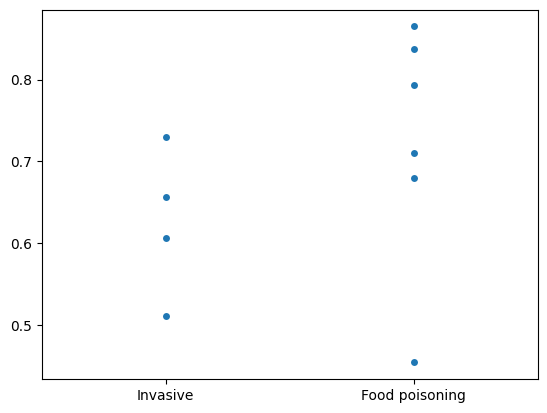

In [101]:
model1, labels_train = train_predict_salmonella(protein_scores, labels)

sns.swarmplot(x=labels_train, y=model1.oob_decision_function_[:,0])

### Improving Our Machine Learning Model

#### Assessing Model Accuracy

After training our model, we might find that it’s not as accurate as we hoped. This is a common issue in machine learning, and it’s something that can often be improved. Just like how you might try different study techniques to see which helps you remember better for a test, we can try different techniques to help our model learn better.

#### What Does Accuracy Mean Here?

Accuracy in this context refers to how often our model correctly predicts whether a strain of Salmonella is invasive or just causes food poisoning. If our model's accuracy is low, it means it's making a lot of mistakes in its predictions. When we look at the scores above, it would be hard to draw a horizontal line through them that perfectly separated our two groups. Let's see if we can improve this!

#### Pruning Unhelpful Proteins

To improve our model, we can remove proteins that don't help it make correct predictions. This process is known as "feature selection" or "pruning." By doing this, we reduce the complexity of the model, which can help in two ways:
1. **Easier Decision-Making**: With fewer, more impactful features (proteins), each decision tree in our random forest has an easier time picking out the important genes to focus on.
2. **Better Performance**: Reducing the number of features can often help enhance the model's performance, not just in terms of accuracy but also by making it faster and more efficient.

#### How Do We Prune Features?

Here's a simplified explanation of how we might prune features:
- We look at the importance scores given to each protein by our model. The model will consider a protein important if the scores for that protein separate the two types of Salmonella well. The model will give a protein a low importance if the scores for that protein don't separate the Salmonella very well. 
- We remove these low-importance proteins from our dataset and try training a new model.

### Conclusion

By pruning unhelpful features, we make our model leaner and potentially more accurate. It's like editing an essay: sometimes, removing the extra words or sentences that don’t add value can make your main points stand out more clearly. In the next steps, we'll see if our pruned model does a better job of predicting the behavior of Salmonella strains.

<Axes: >

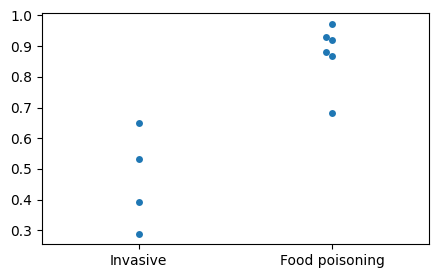

In [102]:
# trim features with low importance

protein_scores_trim = protein_scores.loc[:,model1.feature_importances_ > 0.005]

model2, labels_train = train_predict_salmonella(protein_scores_trim, labels)

plt.figure(figsize=(5, 3))
sns.swarmplot(x=labels_train, y=model2.oob_decision_function_[:,0])

### Understanding Our Improved Machine Learning Model

#### Seeing the Improvement

After removing the unhelpful proteins (features), our model is now doing much better! This means it's making more correct predictions about whether different strains of Salmonella are likely to be invasive or just cause food poisoning.

#### Why Analyze the Proteins?

The next step is to understand *why* our model is making better predictions. This involves looking at the proteins the model is now using to make its decisions. By examining these proteins, we can learn a lot about what might make some strains of Salmonella more dangerous than others.

#### What Does It Mean If a Gene is 'Broken'?

In the context of our study, a "broken" gene means a gene that doesn't function as it normally would. This could mean the protein it produces doesn't fold correctly, is missing completely, or looks right but can't perform a key function.

#### How to Analyze the Genes?

To analyze the genes our model finds important, we can:
1. **List the Important Genes**: Identify which genes the model is using to make predictions and see how these genes differ between invasive and food poisoning strains.
2. **Research Gene Functions**: Look up what these genes do in Salmonella. This can help us understand why changes in these genes might make the bacteria more invasive.
3. **Compare Broken Status**: Check if these important genes are more likely to be broken in invasive strains compared to those that cause food poisoning. This might involve looking at the data to see how often these genes are altered in different types of infections.

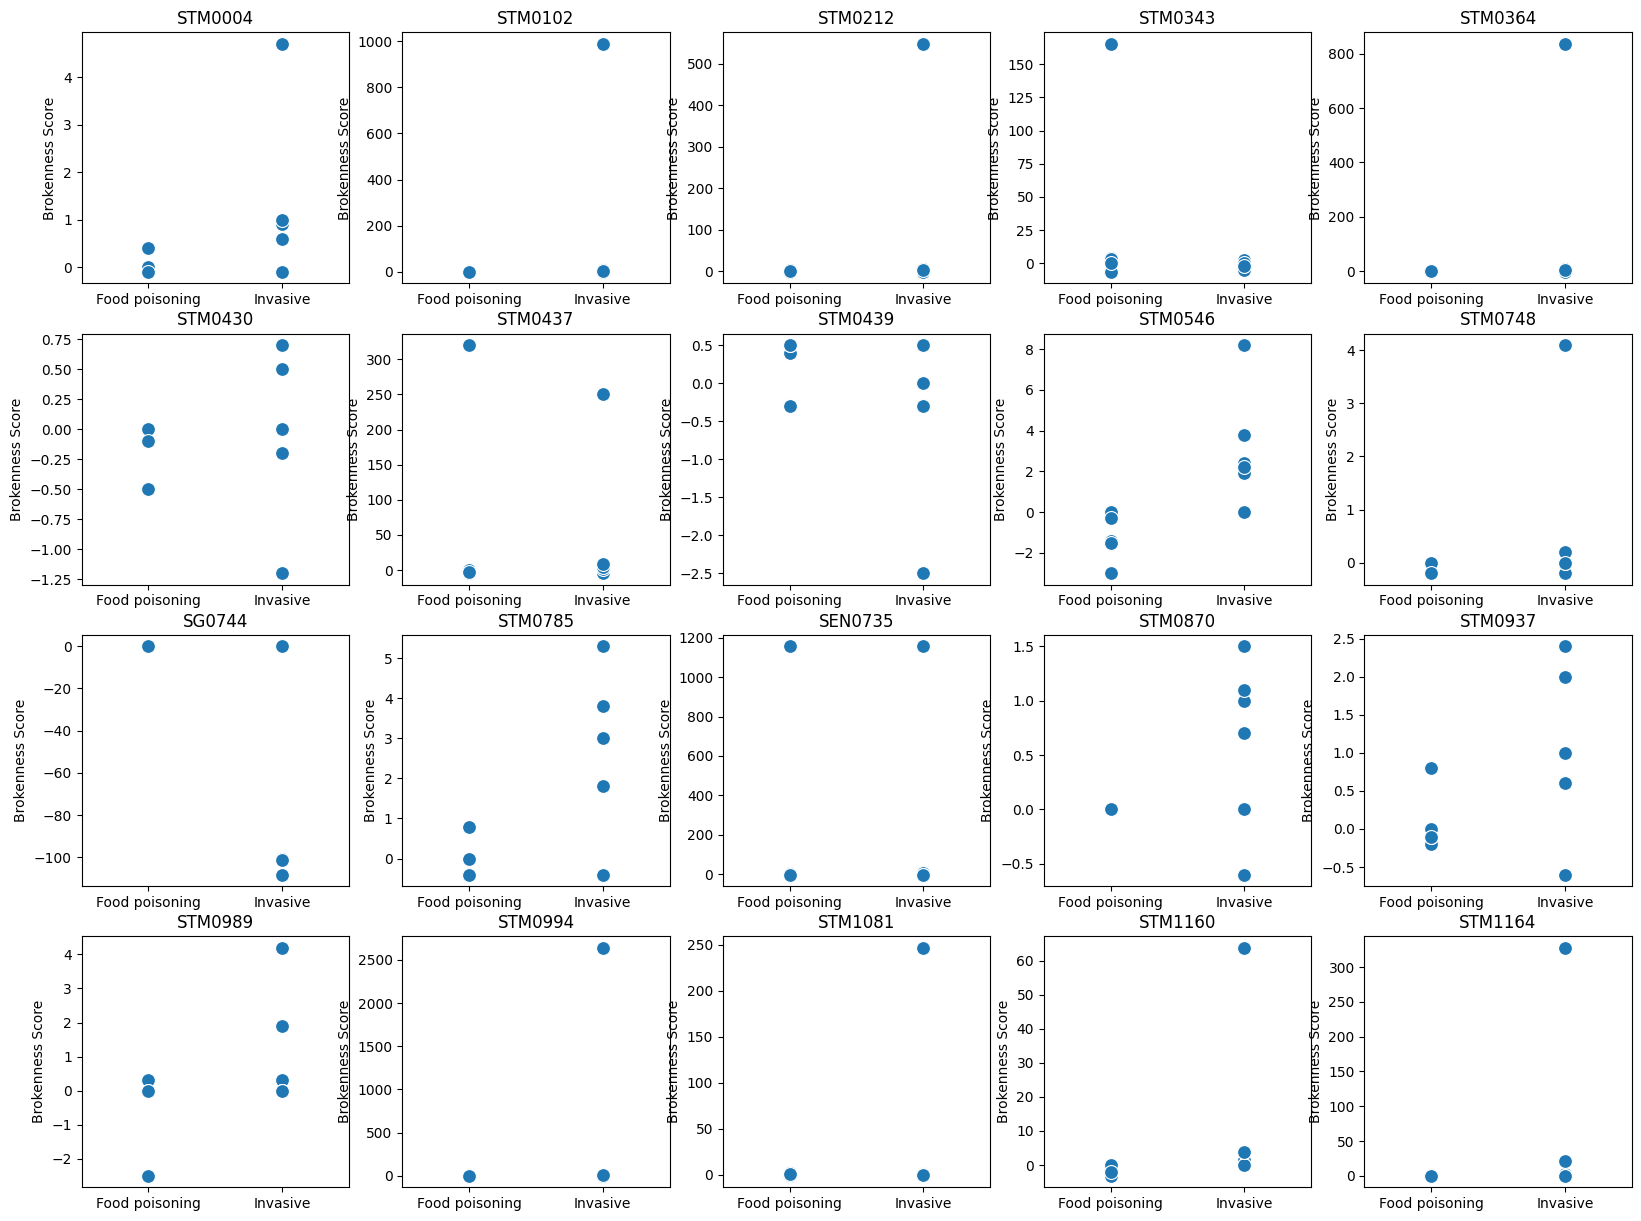

In [103]:
# Create a grid of plots for the first 20 proteins
fig, axes = plt.subplots(4, 5, figsize=(20, 15))

# Loop through each protein and plot

for i, ax in enumerate(axes.flat):
    sns.scatterplot(x=labels, y=protein_scores_trim.iloc[:,i], ax=ax, s=100)
    ax.set_title(protein_scores_trim.columns[i])
    ax.set_ylabel('Brokenness Score')
    ax.set_xlim(-0.5, 1.5)

### Conclusion

By analyzing the genes our model deems important, we gain insights into what might make some Salmonella strains more harmful than others. This step is crucial for understanding not just *what* our model predicts, but *why* it makes these predictions. These insights are valuable for scientific research and can help in developing better treatments or preventive measures against invasive Salmonella infections.
